Importăm bibliotecile necesare

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Pentru modelul de regresie

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

Incarcam dataset-ul

In [3]:
data = pd.read_csv('train.csv')

Vizualizează primele 5 rânduri pentru a înțelege structura dataset-ului

In [4]:
print(data.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

Verificăm valorile lipsă

In [5]:
print(data.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


Umplem valorile lipsă cu media pentru variabilele numerice

In [7]:
numeric_cols = data.select_dtypes(include=[np.number]).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

In [8]:
categorical_cols = data.select_dtypes(include=[object]).columns
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])

In [9]:
data = data.drop(columns=['Id'])

Definim X (input) și y (target/output)

In [10]:
X = data[['GrLivArea', 'YearBuilt']]  # variabilele de intrare
y = data['SalePrice']  # variabila țintă, prețul casei

Împărțim datele în set de antrenament și de test


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Regresie liniara

In [12]:
# Creăm modelul de regresie liniară
linear_model = LinearRegression()

# Antrenăm modelul
linear_model.fit(X_train, y_train)

# Prezicem pe setul de test
y_pred_linear = linear_model.predict(X_test)

# Calculăm eroarea pătratică medie
mse_linear = mean_squared_error(y_test, y_pred_linear)
print(f"Mean Squared Error (Linear Regression): {mse_linear}")

# Creăm modelul Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Antrenăm modelul
rf_model.fit(X_train, y_train)

# Prezicem pe setul de test
y_pred_rf = rf_model.predict(X_test)

# Calculăm eroarea pătratică medie
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Mean Squared Error (Random Forest): {mse_rf}")


Mean Squared Error (Linear Regression): 2495554898.6683216
Mean Squared Error (Random Forest): 1546711974.025004


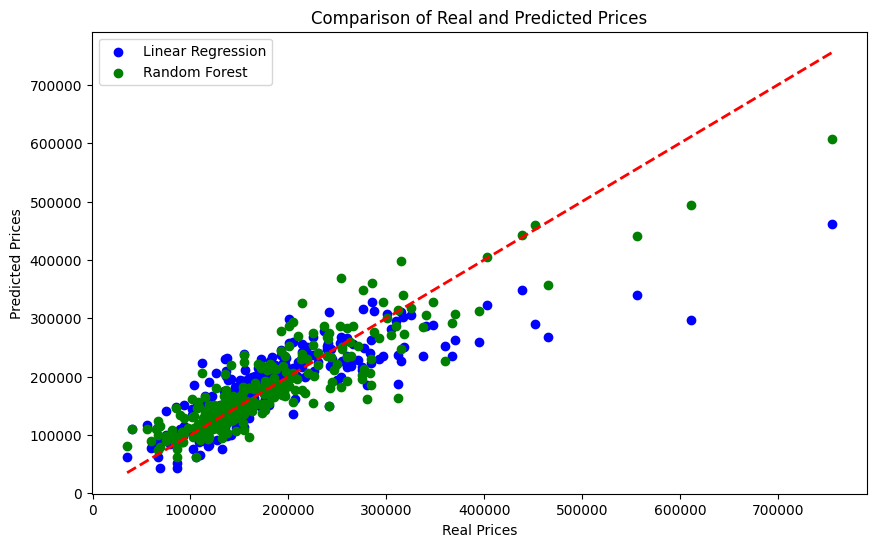

In [13]:
# Plotăm rezultatele pentru regresia liniară
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear, color='blue', label='Linear Regression')
plt.scatter(y_test, y_pred_rf, color='green', label='Random Forest')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, linestyle='--')
plt.xlabel('Real Prices')
plt.ylabel('Predicted Prices')
plt.title('Comparison of Real and Predicted Prices')
plt.legend()
plt.show()
